# Evasive malicious PDF Classification
---
This is a project for reserach purpose using CIC evasivePDF 2022 Dataset : [Link](http://205.174.165.80/CICDataset/CICEvasivePDFMal2022/Dataset/PDFMalware2022.csv)

## Steps on this project
**1.** Pre-Processing


1.   Data Analysis
2.   Data Cleansing
  *   Checking Null value
  *   Deleting Null Value

  *   Examine ourliers
  *   Deleting Outliers / Handling Outliers
> Output : Orignal Dataset , Dropped Outliers, handling outliers
  *   Action after analysis

3. Feature Engineering
  * One Hot Encoding
  * Label Encoding

**2.** model initiation
* Gradient Boosting Classifier
* XGB
* Deep learning
* Scikit MLP

**3.** training and eval
* Training and eval sesuai refrensi
* hyper parameter

**4.** benchmarking


---

# Pre Processing

In [1]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Tensorflow
import tensorflow as tf
from tensorflow.keras import backend as K

#scipy
import numpy as np
import pandas as pd

#sklearn #preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder


#sklearn model: Classifiers
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#XGboost
from xgboost import XGBClassifier

#sklearn matrics
from sklearn.metrics import mean_squared_error, r2_score, f1_score,accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

#Other
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn import datasets
from matplotlib.colors import ListedColormap
from sklearn import preprocessing

#plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#regex
import re

import joblib

In [3]:
!wget http://205.174.165.80/CICDataset/CICEvasivePDFMal2022/Dataset/PDFMalware2022.csv

--2023-04-28 07:41:29--  http://205.174.165.80/CICDataset/CICEvasivePDFMal2022/Dataset/PDFMalware2022.csv
Connecting to 205.174.165.80:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1572585 (1.5M) [text/csv]
Saving to: ‘PDFMalware2022.csv’

PDFMalware2022.csv  100%[===================>]   1.50M  1.25MB/s    in 1.2s    

2023-04-28 07:41:30 (1.25 MB/s) - ‘PDFMalware2022.csv’ saved [1572585/1572585]



In [4]:
df = pd.read_csv("/content/PDFMalware2022.csv")
df = df.drop("Fine name", axis=1)
df

,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,header,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,No,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
1,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,No,\t%PDF-1.6,...,0,0,1,0,0,0,8,1,0.0,Malicious
2,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,Yes,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
3,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,No,\t%PDF-1.3,...,0,1,1,0,0,0,0,0,0.0,Malicious
4,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,Yes,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,529.0,296.0,1.0,87.0,8.0,0.0,0.0,3,No,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
10022,73.0,314.0,1.0,16.0,3.0,0.0,0.0,-1,unclear,\t%PDF-\x07.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
10023,4.0,377.0,2.0,13.0,11.0,0.0,0.0,0,Yes,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
10024,38.0,338.0,1.0,200006.0,13.0,0.0,0.0,0,Yes,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious


In [5]:
df['pages'][2] = 1

<ipython-input-5-669753c36485>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pages'][2] = 1


In [6]:
df['pages'][2]

1.0

In [7]:
df.describe()

,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,stream,trailer,encrypt,ObjStm,Colors
count,10025.000000,10025.000000,10025.000000,10025.000000,10025.000000,10025.000000,10025.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000
mean,87.209476,334.099352,3.398005,2739.220549,51.477207,-0.020848,-0.006484,17.341215,1.203532,-0.043500,1.516811,2.087000
std,444.197122,1565.853177,11.902487,18139.229396,1354.640037,0.206789,0.257098,35.330169,1.370455,0.256045,7.633485,58.178074
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,9.000000,180.000000,1.000000,12.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,36.000000,265.000000,1.000000,21.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000
75%,80.000000,319.000000,2.000000,77.000000,13.000000,0.000000,0.000000,18.000000,2.000000,0.000000,0.000000,0.000000
max,23816.000000,77185.000000,595.000000,263987.000000,76993.000000,4.000000,5.000000,812.000000,46.000000,2.000000,600.000000,5682.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10026 entries, 0 to 10025
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pdfsize           10025 non-null  float64
 1   metadata size     10025 non-null  float64
 2   pages             10025 non-null  float64
 3   xref Length       10025 non-null  float64
 4   title characters  10025 non-null  float64
 5   isEncrypted       10025 non-null  float64
 6   embedded files    10025 non-null  float64
 7   images            10025 non-null  object 
 8   text              10025 non-null  object 
 9   header            10025 non-null  object 
 10  obj               10023 non-null  object 
 11  endobj            10023 non-null  object 
 12  stream            10023 non-null  float64
 13  endstream         10023 non-null  object 
 14  xref              10023 non-null  object 
 15  trailer           10023 non-null  float64
 16  startxref         10023 non-null  object

In [9]:
df_object = []
for i in df:
  if df[i].dtype == np.object_:
    df_object.append(i)

In [10]:
# Checking value in the Object type list
for i in df_object:
  display(df[i].value_counts())

0      6460
1      1394
-1      851
2       182
3       121
       ... 
109       1
172       1
84        1
111       1
126       1
Name: images, Length: 89, dtype: int64

No         5400
Yes        3761
unclear     549
-1          302
0            13
Name: text, dtype: int64

\t%PDF-1.3                                                                                         2347
\t%PDF-1.4                                                                                         1911
\t%PDF-1.7                                                                                         1604
\t%PDF-1.6                                                                                         1190
\t%PDF-1.2                                                                                          688
\t%PDF-1.5                                                                                          536
\ta                                                                                                 485
\t%PDF-1.0                                                                                          331
\t%PDF-\x07.3                                                                                       232
\t%PDF-1.1                                                      

9       1182
-1       770
8        722
11       414
6        411
        ... 
243        1
1973       1
795        1
774        1
1099       1
Name: obj, Length: 479, dtype: int64

9       1171
8        619
-1       514
6        476
11       415
        ... 
549        1
452        1
179        1
177        1
1099       1
Name: endobj, Length: 478, dtype: int64

2      1966
3      1304
1      1008
-1      519
9       360
       ... 
231       1
191       1
188       1
236       1
411       1
Name: endstream, Length: 241, dtype: int64

1           4545
2           2525
0           1967
-1           519
3            191
4            163
6             42
pdfid.py      22
5             12
8              9
7              8
10             5
9              3
22             2
16             2
46             2
14             2
28             1
12             1
33             1
15             1
Name: xref, dtype: int64

1                   5065
2                   2812
0                    629
3                    620
-1                   519
4                    206
5                     88
6                     25
bytes[endHeader]      22
10                    10
7                      8
9                      5
8                      4
12                     3
24                     2
68                     1
39                     1
11                     1
20                     1
15                     1
Name: startxref, dtype: int64

1        5419
2         983
0         623
3         537
-1        519
         ... 
117         1
5(1)        1
107         1
53(2)       1
74          1
Name: pageno, Length: 96, dtype: int64

0        5204
1        2879
2         802
-1        541
1(1)      226
3         171
5         102
4          58
6           5
20          3
8           3
19          2
16          2
38          2
12          2
2(2)        2
13          2
149         2
9           2
44          1
52          1
7           1
14          1
15          1
32          1
34          1
110         1
30          1
404         1
71          1
29(2)       1
63          1
Name: JS, dtype: int64

0        5098
1        2078
2        1107
3         708
-1        541
4         192
6         108
1(1)       79
5          39
2(1)       21
>          13
7           4
13          4
16          3
19          2
20          2
149         2
9           2
8           2
3(1)        2
10          2
39          1
44          1
53          1
15          1
38          1
111         1
34          1
31          1
404         1
21          1
72          1
2(2)        1
34(2)       1
63          1
Name: Javascript, dtype: int64

0       8964
-1       554
1        385
2         33
1(1)      14
3          8
10         6
4          6
13         4
12         4
8          4
47         3
11         3
7          3
21         2
23         2
115        2
9          2
15         2
17         2
198        1
66         1
33         1
52         1
60         1
24         1
183        1
133        1
31         1
61         1
49         1
132        1
40         1
213        1
18         1
22         1
14         1
182        1
207        1
151        1
Name: AA, dtype: int64

0        6393
1        2927
-1        554
1(1)       87
2          53
3           6
4           2
12(2)       1
Name: OpenAction, dtype: int64

0       6432
1       2265
2        665
-1       554
3         76
1(1)      13
4         12
5          3
6          2
8          1
Name: Acroform, dtype: int64

0       9320
-1       554
1         81
4         14
2          9
3          9
5          7
1(1)       6
6          6
11         5
9          3
13         3
7          3
12         1
8          1
14         1
Name: JBIG2Decode, dtype: int64

0       9417
-1       554
1         39
2          6
4          3
1(1)       3
2(2)       1
Name: RichMedia, dtype: int64

0       9339
-1       554
1        116
1(1)      10
2          4
Name: launch, dtype: int64

0        8644
-1        554
8         444
1         151
9          87
10         38
11         34
1(1)       32
6          18
2           7
12          3
5           2
3           2
13          2
12(2)       1
4           1
17          1
14          1
15          1
Name: EmbeddedFile, dtype: int64

0       8953
-1       554
1        475
1(1)      20
2         19
4          1
5          1
Name: XFA, dtype: int64

Malicious    5557
Benign       4468
Name: Class, dtype: int64

In [11]:
# Finding other type data in the lists
df_xref_numeric = df['xref'].str.isnumeric()
df_xref_numeric = pd.concat({'xref':df['xref'],'value':df_xref_numeric},axis=1)
df_xref_numeric.query("`value` == False").value_counts()

xref      value
-1        False    519
pdfid.py  False     22
dtype: int64

In [12]:
df

,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,header,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,No,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
1,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,No,\t%PDF-1.6,...,0,0,1,0,0,0,8,1,0.0,Malicious
2,4.0,468.0,1.0,13.0,16.0,0.0,0.0,0,Yes,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
3,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,No,\t%PDF-1.3,...,0,1,1,0,0,0,0,0,0.0,Malicious
4,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,Yes,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,529.0,296.0,1.0,87.0,8.0,0.0,0.0,3,No,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
10022,73.0,314.0,1.0,16.0,3.0,0.0,0.0,-1,unclear,\t%PDF-\x07.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
10023,4.0,377.0,2.0,13.0,11.0,0.0,0.0,0,Yes,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
10024,38.0,338.0,1.0,200006.0,13.0,0.0,0.0,0,Yes,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious


In [13]:
test = df.sort_values(["Class"], axis = 0)
test

,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,header,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
7519,402.0,437.0,4.0,1296.0,32.0,0.0,0.0,0,Yes,\t%PDF-1.4,...,1,0,2,0,0,0,0,0,0.0,Benign
6927,68.0,262.0,1.0,21.0,0.0,0.0,0.0,1,No,\t%PDF-1.7,...,0,0,1,0,0,0,0,0,0.0,Benign
6928,80.0,272.0,1.0,21.0,0.0,0.0,0.0,1,No,\t%PDF-1.3,...,0,0,0,0,0,0,0,0,0.0,Benign
6929,78.0,283.0,1.0,30.0,0.0,0.0,0.0,12,No,\t%PDF-1.2,...,0,0,0,0,0,0,0,0,0.0,Benign
6930,86.0,262.0,1.0,21.0,0.0,0.0,0.0,1,No,\t%PDF-1.2,...,0,0,0,0,0,0,0,0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3345,8.0,224.0,4.0,18.0,28.0,0.0,0.0,0,Yes,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
3346,6.0,250.0,1.0,15.0,0.0,0.0,0.0,0,No,\t%PDF-1.1,...,0,1,0,0,0,0,0,0,0.0,Malicious
3339,68.0,281.0,1.0,23.0,1.0,0.0,0.0,1,No,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
10025,2.0,180.0,1.0,11.0,0.0,0.0,1.0,0,Yes,\t%PDF-1.6,...,23,0,0,0,0,0,0,0,0.0,Malicious


In [14]:
  df.describe()

,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,stream,trailer,encrypt,ObjStm,Colors
count,10025.000000,10025.000000,10025.000000,10025.000000,10025.000000,10025.000000,10025.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000
mean,87.209476,334.099352,3.398005,2739.220549,51.477207,-0.020848,-0.006484,17.341215,1.203532,-0.043500,1.516811,2.087000
std,444.197122,1565.853177,11.902487,18139.229396,1354.640037,0.206789,0.257098,35.330169,1.370455,0.256045,7.633485,58.178074
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,9.000000,180.000000,1.000000,12.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,36.000000,265.000000,1.000000,21.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000
75%,80.000000,319.000000,2.000000,77.000000,13.000000,0.000000,0.000000,18.000000,2.000000,0.000000,0.000000,0.000000
max,23816.000000,77185.000000,595.000000,263987.000000,76993.000000,4.000000,5.000000,812.000000,46.000000,2.000000,600.000000,5682.000000


In [15]:
df['Class'].value_counts()

Malicious    5557
Benign       4468
Name: Class, dtype: int64

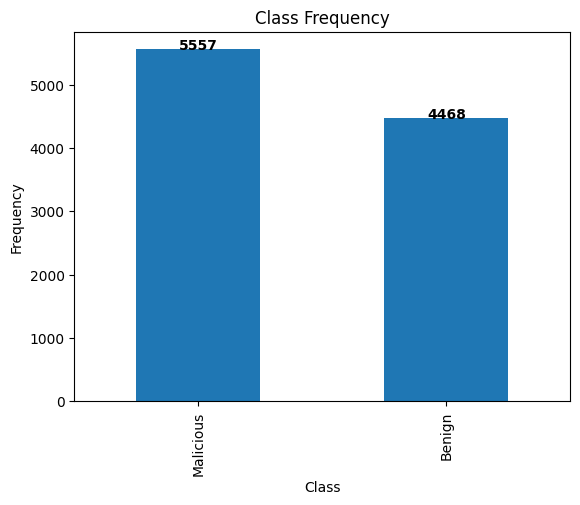

In [16]:
class_counts = df['Class'].value_counts()
class_counts.plot.bar()
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Frequency')

for i, v in enumerate(class_counts.values):
    plt.text(i, v, str(v), color='black', ha='center', fontweight='bold')

plt.show()

### Data Analysis

In [17]:
def showplot(header):
  try:
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.distplot(df[header])
    plt.subplot(1,2,2)
    sns.boxplot(df[header])
    plt.show()
  except:
    pass

def value_c(header):
  print("Value Count")
  print(df[header].value_counts())
  print("\nData Describe")
  print(df[header].describe())
  print("\nOther Data Type :")
  col = header
  try:
    df[col].str.isnumeric() 
    df_temp_numeric = df[col].str.isnumeric()
    df_temp_numeric = pd.concat({col:df[col],'value':df_temp_numeric},axis=1)
    print(df_temp_numeric.query("`value` == False").value_counts())
  except:
    print("Not contain Other Dtype")
  
def analysis(header):
  value_c(header)
  showplot(header)

#### Analisys pdfsize

In [18]:
df['pdfsize'].describe()

count    10025.000000
mean        87.209476
std        444.197122
min         -1.000000
25%          9.000000
50%         36.000000
75%         80.000000
max      23816.000000
Name: pdfsize, dtype: float64

<ipython-input-19-d6308ea97354>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pdfsize'])


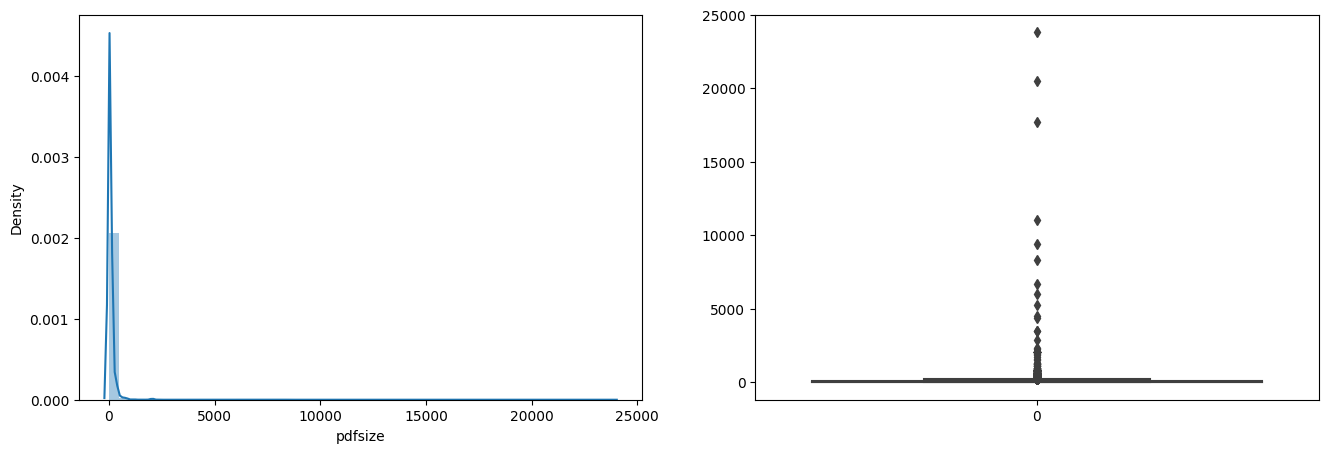

In [19]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['pdfsize'])
plt.subplot(1,2,2)
sns.boxplot(df['pdfsize'])
plt.show()

In [20]:
df[['pdfsize']].query("`pdfsize` == -1").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 1291 to 9857
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pdfsize  302 non-null    float64
dtypes: float64(1)
memory usage: 4.7 KB


In [21]:
df[['pdfsize','Class']].query("`pdfsize` > 600")['Class'].value_counts()

Malicious    117
Benign        16
Name: Class, dtype: int64

In [22]:
#Filling Null Value with zero
df.fillna(0, inplace = True)
df.isnull().sum()

pdfsize             0
metadata size       0
pages               0
xref Length         0
title characters    0
isEncrypted         0
embedded files      0
images              0
text                0
header              0
obj                 0
endobj              0
stream              0
endstream           0
xref                0
trailer             0
startxref           0
pageno              0
encrypt             0
ObjStm              0
JS                  0
Javascript          0
AA                  0
OpenAction          0
Acroform            0
JBIG2Decode         0
RichMedia           0
launch              0
EmbeddedFile        0
XFA                 0
Colors              0
Class               0
dtype: int64

In [23]:
col = 'pdfsize'
try:
    df[col].str.isnumeric() 
    df_temp_numeric = df[col].str.isnumeric()
    df_temp_numeric = pd.concat({col:df[col],'value':df_temp_numeric},axis=1)
    print(df_temp_numeric.query("`value` == False").value_counts())
except:
    print("Not contain Other Dtype")

Not contain Other Dtype


No Notes

#### Analysis metadata size

In [24]:
df['metadata size'].value_counts()

 180.0      2496
 283.0       563
 262.0       360
 298.0       337
-1.0         302
            ... 
 213.0         1
 77185.0       1
 681.0         1
 444.0         1
 190.0         1
Name: metadata size, Length: 403, dtype: int64

In [25]:
df['metadata size'].describe()

count    10026.000000
mean       334.066028
std       1565.778633
min         -1.000000
25%        180.000000
50%        265.000000
75%        319.000000
max      77185.000000
Name: metadata size, dtype: float64

<ipython-input-26-330390e2c994>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['metadata size'])


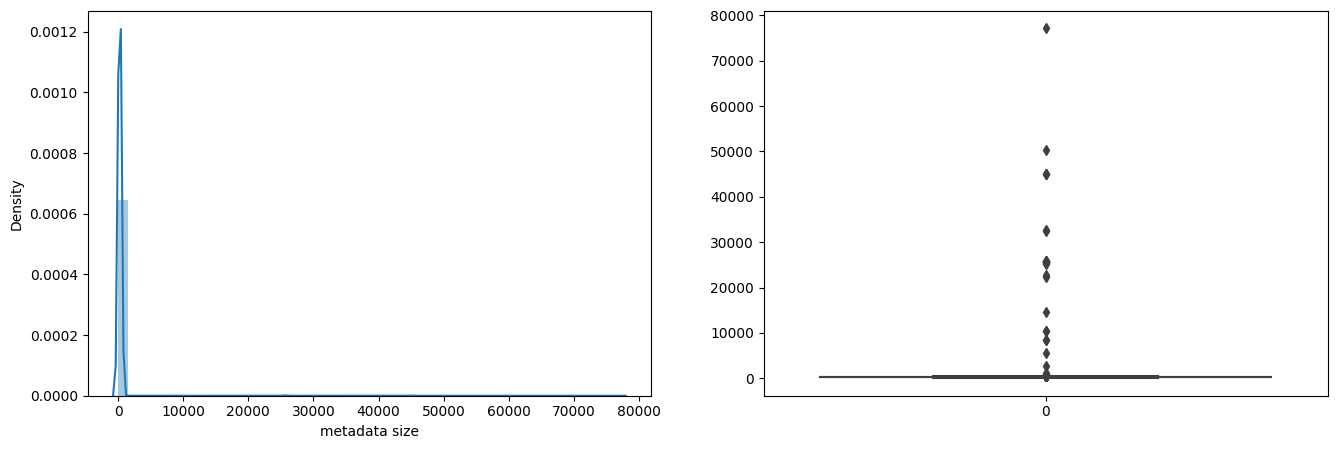

In [26]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['metadata size'])
plt.subplot(1,2,2)
sns.boxplot(df['metadata size'])
plt.show()

In [27]:
col = 'metadata size'
try:
    df[col].str.isnumeric() 
    df_temp_numeric = df[col].str.isnumeric()
    df_temp_numeric = pd.concat({col:df[col],'value':df_temp_numeric},axis=1)
    print(df_temp_numeric.query("`value` == False").value_counts())
except:
    print("Not contain Other Dtype")

Not contain Other Dtype


#### Analysis Pages


In [28]:
df['pages'].value_counts()

1.0      6012
2.0      1079
3.0       455
4.0       376
0.0       366
         ... 
69.0        1
194.0       1
198.0       1
88.0        1
62.0        1
Name: pages, Length: 88, dtype: int64

<ipython-input-29-ff1e09eefccc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pages'])


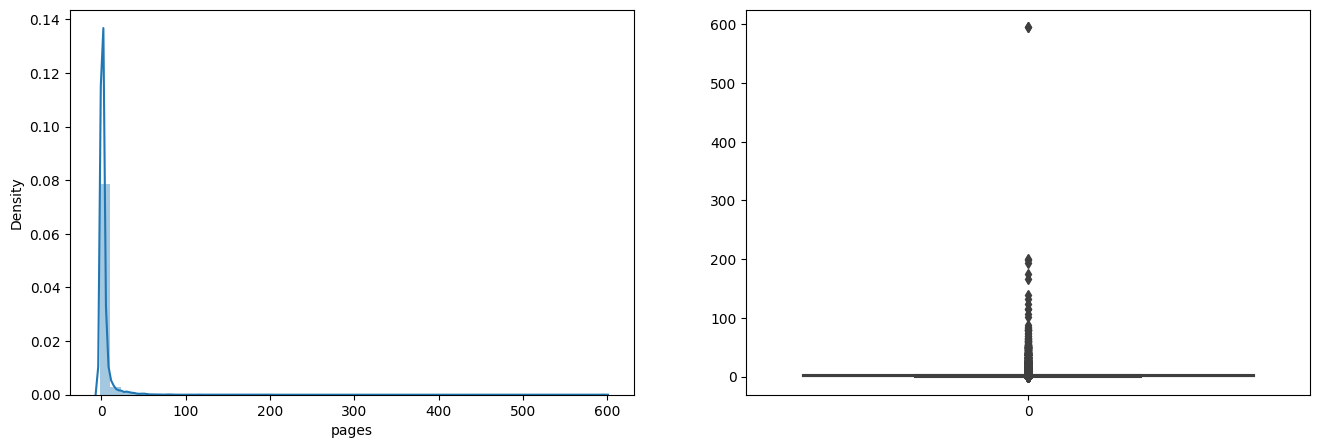

In [29]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['pages'])
plt.subplot(1,2,2)
sns.boxplot(df['pages'])
plt.show()

In [30]:
df['pages'].describe()

count    10026.000000
mean         3.397666
std         11.901941
min         -1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        595.000000
Name: pages, dtype: float64

In [31]:
df[['pages','Class']].query("`pages` == 595.00")

,pages,Class
5103,595.0,Malicious
5121,595.0,Malicious


In [32]:
col = 'pages'
try:
    df[col].str.isnumeric() 
    df_temp_numeric = df[col].str.isnumeric()
    df_temp_numeric = pd.concat({col:df[col],'value':df_temp_numeric},axis=1)
    print(df_temp_numeric.query("`value` == False").value_counts())
except:
    print("Not contain Other Dtype")

Not contain Other Dtype


#### Analysis xref Legth

In [33]:
df['xref Length'].value_counts()

10.0      984
16.0      770
9.0       571
21.0      555
12.0      399
         ... 
768.0       1
1016.0      1
965.0       1
304.0       1
299.0       1
Name: xref Length, Length: 905, dtype: int64

In [34]:
try:
  df['xref Length'].str.isnumeric()
except:
  print("Not contain Other Dtype")

Not contain Other Dtype


<ipython-input-35-5179570c6760>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['xref Length'])


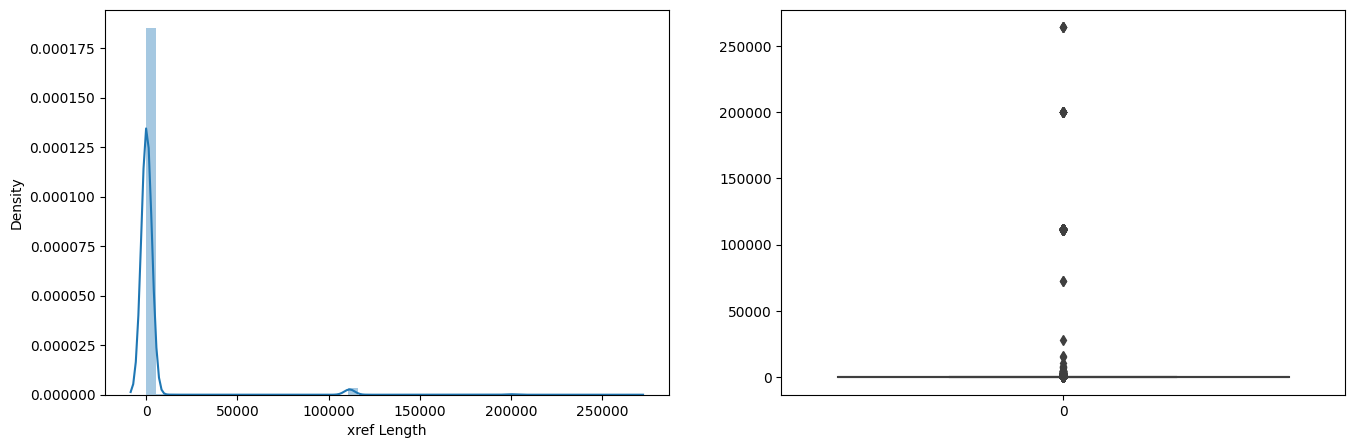

In [35]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['xref Length'])
plt.subplot(1,2,2)
sns.boxplot(df['xref Length'])
plt.show()

#### Analysis title characters

In [36]:
df['title characters'].value_counts()

 0.0      5893
 16.0      438
 7.0       307
-1.0       302
 8.0       208
          ... 
 286.0       1
 159.0       1
 123.0       1
 151.0       1
 160.0       1
Name: title characters, Length: 149, dtype: int64

In [37]:
try:
  df['title characters'].str.isnumeric()
except:
  print("Not contain Other Dtype")

Not contain Other Dtype


<ipython-input-38-e25c6b5a3c1f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['title characters'])


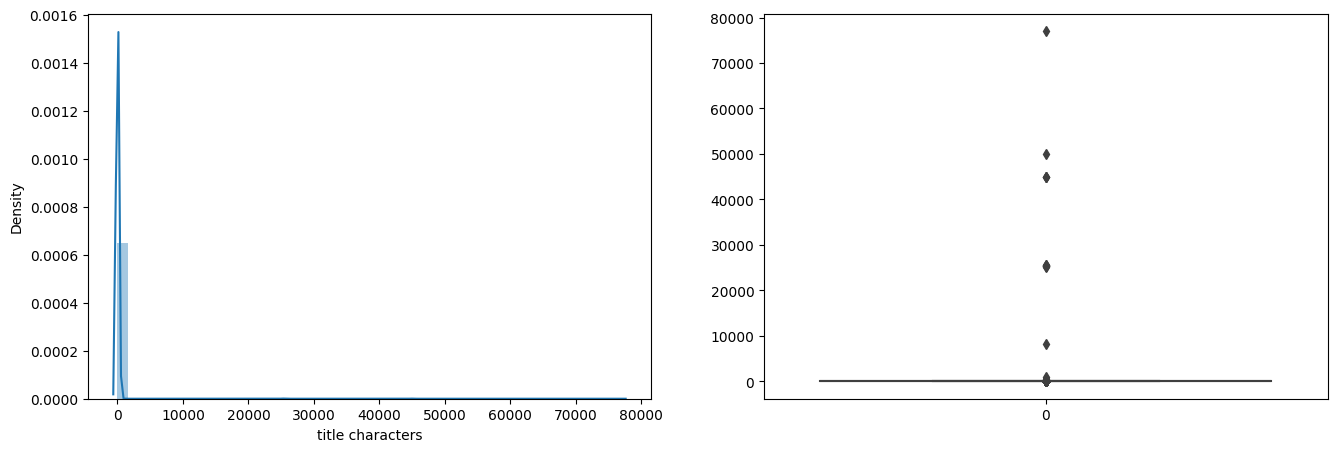

In [38]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['title characters'])
plt.subplot(1,2,2)
sns.boxplot(df['title characters'])
plt.show()

#### Analysis isEncrypted

In [39]:
df['isEncrypted'].value_counts()

 0.0    9643
-1.0     302
 1.0      75
 3.0       4
 2.0       1
 4.0       1
Name: isEncrypted, dtype: int64

In [40]:
try:
  df['isEncrypted'].str.isnumeric()
except:
  print("Not contain Other Dtype")

Not contain Other Dtype


#### Analysis embedded files	

In [41]:
df['embedded files'].value_counts()

 0.0    9518
-1.0     302
 1.0     193
 2.0       4
 5.0       4
 3.0       4
 4.0       1
Name: embedded files, dtype: int64

In [42]:
try:
  df['embedded files'].str.isnumeric()
except:
  print("Not contain Other Dtype")

Not contain Other Dtype


#### Analysis images

In [43]:
df['images'].value_counts()

0       6460
1       1394
-1       851
2        182
3        121
        ... 
172        1
1(1)       1
84         1
111        1
126        1
Name: images, Length: 90, dtype: int64

In [44]:
col = 'images'

 # Finding other type data in the lists
try:
  df[col].str.isnumeric() 
  df_temp_numeric = df[col].str.isnumeric()
  df_temp_numeric = pd.concat({col:df[col],'value':df_temp_numeric},axis=1)
  print(df_temp_numeric.query("`value` == False").value_counts())
except:
  print("Not contain Other Dtype")

images  value
-1      False    851
1(1)    False      1
dtype: int64


In [45]:
df['images'].str.isnumeric()

0         True
1         True
2         True
3         True
4         True
         ...  
10021     True
10022    False
10023     True
10024     True
10025     True
Name: images, Length: 10026, dtype: object

#### Analysis stream


In [46]:
df['stream'].value_counts()

 2.0      1995
 3.0      1308
 1.0      1010
-1.0       541
 9.0       361
          ... 
 632.0       1
 167.0       1
 168.0       1
 469.0       1
 411.0       1
Name: stream, Length: 238, dtype: int64

In [47]:
try:
  df['stream'].str.isnumeric()
except:
  print("Not contain Other Dtype")

Not contain Other Dtype


#### Analysis text

Value Count
No         5400
Yes        3761
unclear     549
-1          302
0            13
0             1
Name: text, dtype: int64

Data Describe
count     10026
unique        6
top          No
freq       5400
Name: text, dtype: object

Other Data Type :
text     value
No       False    5400
Yes      False    3761
unclear  False     549
-1       False     302
dtype: int64


<ipython-input-17-7f359b4b198d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[header])


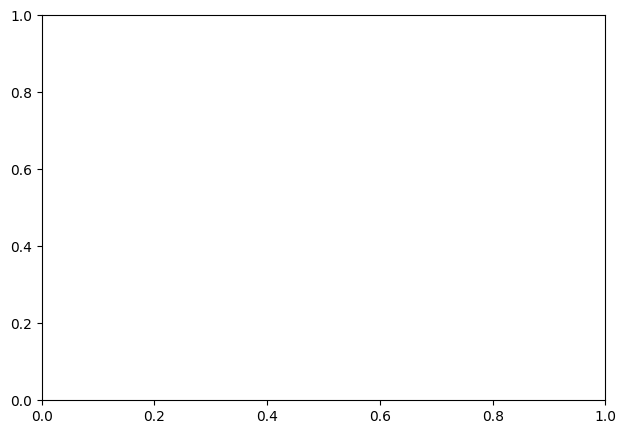

In [48]:
analysis("text")

#### Analysis header

Value Count
\t%PDF-1.3                                                                                         2347
\t%PDF-1.4                                                                                         1911
\t%PDF-1.7                                                                                         1604
\t%PDF-1.6                                                                                         1190
\t%PDF-1.2                                                                                          688
\t%PDF-1.5                                                                                          536
\ta                                                                                                 485
\t%PDF-1.0                                                                                          331
\t%PDF-\x07.3                                                                                       232
\t%PDF-1.1                                          

<ipython-input-17-7f359b4b198d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[header])


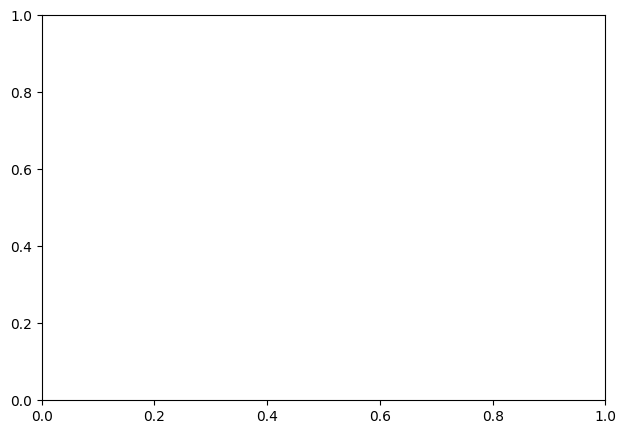

In [49]:
analysis('header')


#### Analysys obj

Value Count
9       1182
-1       770
8        722
11       414
6        411
        ... 
243        1
1973       1
795        1
774        1
1099       1
Name: obj, Length: 480, dtype: int64

Data Describe
count     10026
unique      480
top           9
freq       1182
Name: obj, dtype: object

Other Data Type :
obj               value
-1                False    770
(most             False     22
_Pro_Rodeo_Pix_   False      1
_Pro_Rodeo_Pix_'  False      1
dtype: int64


<ipython-input-17-7f359b4b198d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[header])


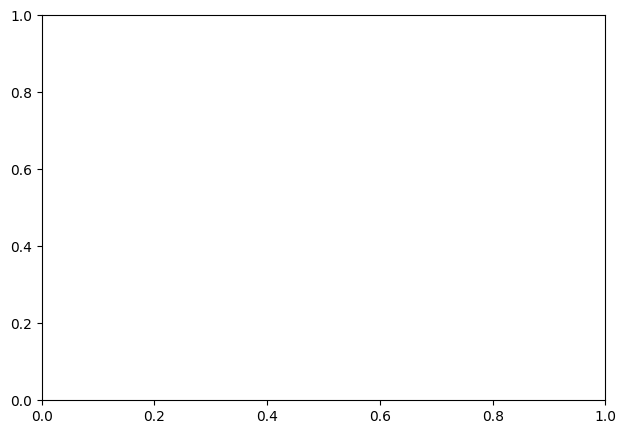

In [50]:
analysis('obj')


#### Analysis endobj

Value Count
9       1171
8        619
-1       514
6        476
11       415
        ... 
1767       1
795        1
774        1
549        1
1099       1
Name: endobj, Length: 479, dtype: int64

Data Describe
count     10026
unique      479
top           9
freq       1171
Name: endobj, dtype: object

Other Data Type :
endobj    value
-1        False    514
pdfid.py  False     22
dtype: int64


<ipython-input-17-7f359b4b198d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[header])


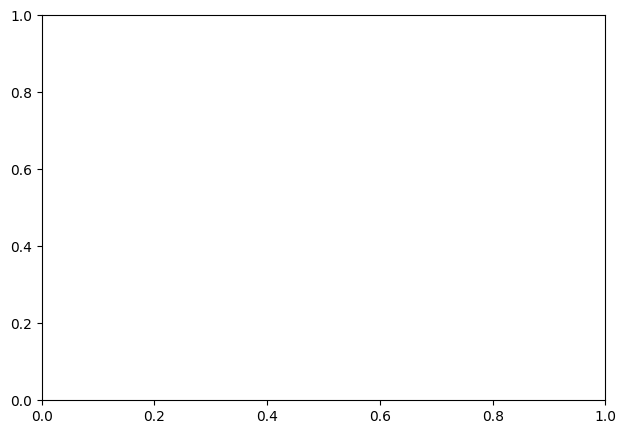

In [51]:
analysis('endobj')


#### Analysisi endstream

Value Count
2      1966
3      1304
1      1008
-1      519
9       360
       ... 
231       1
191       1
188       1
236       1
411       1
Name: endstream, Length: 242, dtype: int64

Data Describe
count     10026
unique      242
top           2
freq       1966
Name: endstream, dtype: object

Other Data Type :
endstream   value
-1          False    519
pdfHeader)  False     22
1(1)        False      1
dtype: int64


<ipython-input-17-7f359b4b198d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[header])


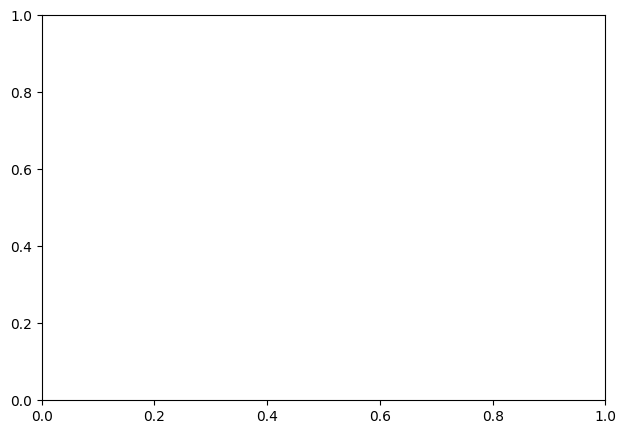

In [52]:
analysis('endstream')

#### Analsysis xref

Value Count
1           4545
2           2525
0           1967
-1           519
3            191
4            163
6             42
pdfid.py      22
5             12
8              9
7              8
10             5
0              3
9              3
22             2
16             2
46             2
14             2
28             1
12             1
33             1
15             1
Name: xref, dtype: int64

Data Describe
count     10026
unique       22
top           1
freq       4545
Name: xref, dtype: object

Other Data Type :
xref      value
-1        False    519
pdfid.py  False     22
dtype: int64


<ipython-input-17-7f359b4b198d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[header])


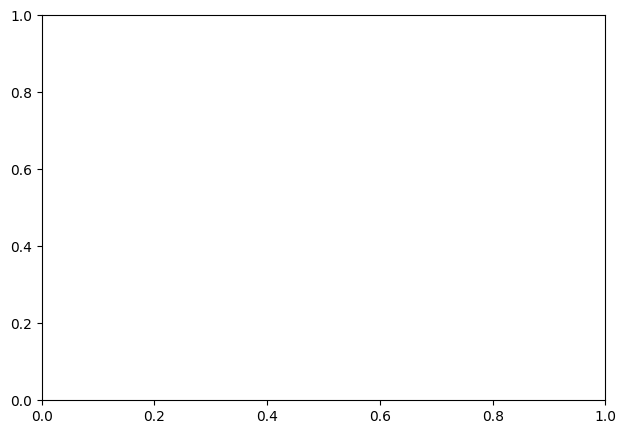

In [53]:
analysis('xref')


#### Analysisi Trailer

Value Count
 1.0     5150
 2.0     2703
 0.0     1184
-1.0      541
 3.0      194
 4.0      163
 6.0       42
 5.0       12
 8.0        9
 7.0        8
 10.0       5
 9.0        2
 15.0       2
 22.0       2
 16.0       2
 46.0       2
 14.0       2
 30.0       1
 12.0       1
 38.0       1
Name: trailer, dtype: int64

Data Describe
count    10026.000000
mean         1.203172
std          1.370408
min         -1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         46.000000
Name: trailer, dtype: float64

Other Data Type :
Not contain Other Dtype


<ipython-input-17-7f359b4b198d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[header])


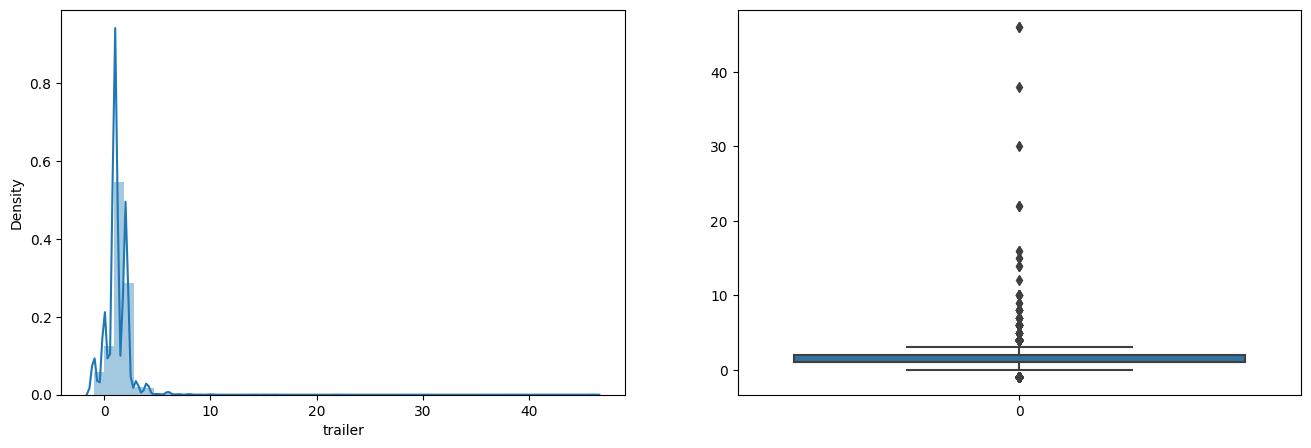

In [54]:
analysis('trailer')


#### Analysis startxref

Value Count
1                   5065
2                   2812
0                    629
3                    620
-1                   519
4                    206
5                     88
6                     25
bytes[endHeader]      22
10                    10
7                      8
9                      5
8                      4
12                     3
0                      3
24                     2
68                     1
39                     1
11                     1
20                     1
15                     1
Name: startxref, dtype: int64

Data Describe
count     10026
unique       21
top           1
freq       5065
Name: startxref, dtype: object

Other Data Type :
startxref         value
-1                False    519
bytes[endHeader]  False     22
dtype: int64


<ipython-input-17-7f359b4b198d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[header])


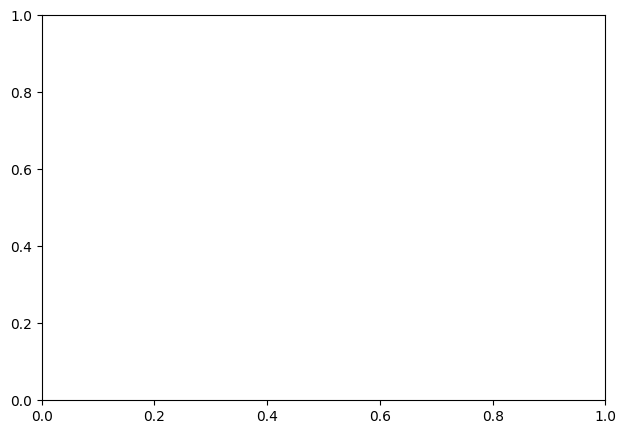

In [55]:
analysis('startxref')


#### Analysis pageno

Value Count
1      5419
2       983
0       623
3       537
-1      519
       ... 
58        1
85        1
139       1
116       1
74        1
Name: pageno, Length: 97, dtype: int64

Data Describe
count     10026
unique       97
top           1
freq       5419
Name: pageno, dtype: object

Other Data Type :
pageno  value
-1      False    519
1(1)    False    104
list    False     22
2(1)    False      5
2(2)    False      4
5(1)    False      1
53(2)   False      1
dtype: int64


<ipython-input-17-7f359b4b198d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[header])


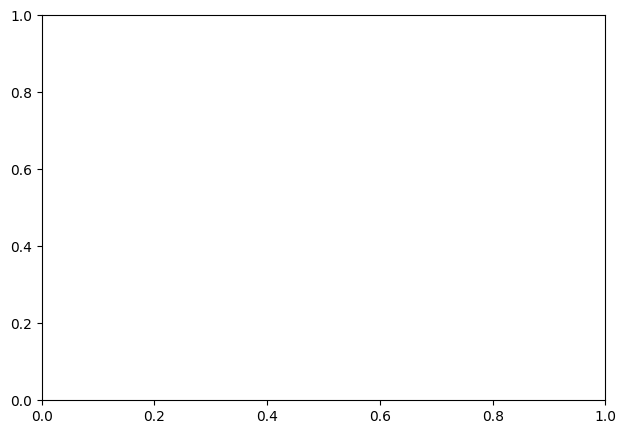

In [56]:
analysis('pageno')


#### Analysisi encrypt

Value Count
 0.0    9395
-1.0     541
 1.0      75
 2.0      15
Name: encrypt, dtype: int64

Data Describe
count    10026.000000
mean        -0.043487
std          0.256008
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: encrypt, dtype: float64

Other Data Type :
Not contain Other Dtype


<ipython-input-17-7f359b4b198d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[header])


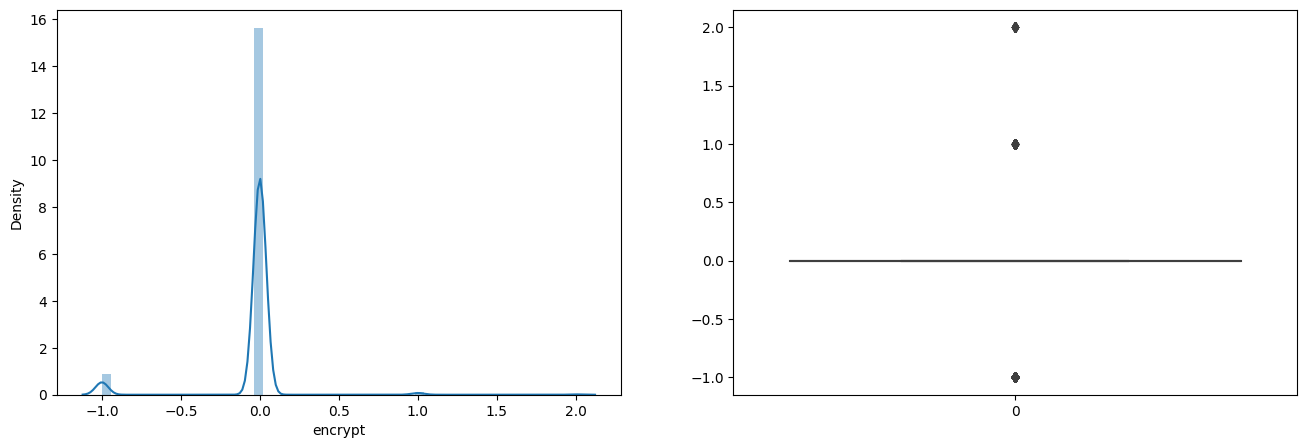

In [57]:
analysis('encrypt')

#### Analysis ObjStm

Value Count
 0.0      7686
-1.0       541
 5.0       238
 1.0       192
 2.0       171
 4.0       146
 3.0       145
 6.0        95
 8.0        80
 10.0       76
 9.0        73
 7.0        72
 14.0       61
 13.0       54
 11.0       54
 12.0       53
 16.0       45
 15.0       44
 18.0       30
 17.0       23
 19.0       21
 20.0       16
 21.0       11
 25.0       10
 22.0       10
 23.0        9
 26.0        7
 33.0        6
 31.0        6
 24.0        5
 47.0        4
 52.0        4
 32.0        4
 29.0        3
 35.0        3
 30.0        3
 42.0        2
 38.0        2
 27.0        2
 28.0        2
 41.0        2
 36.0        2
 61.0        1
 39.0        1
 49.0        1
 51.0        1
 45.0        1
 48.0        1
 78.0        1
 600.0       1
 44.0        1
 34.0        1
 60.0        1
 53.0        1
 68.0        1
Name: ObjStm, dtype: int64

Data Describe
count    10026.000000
mean         1.516357
std          7.632388
min         -1.000000
25%          0.000000
50%        

<ipython-input-17-7f359b4b198d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[header])


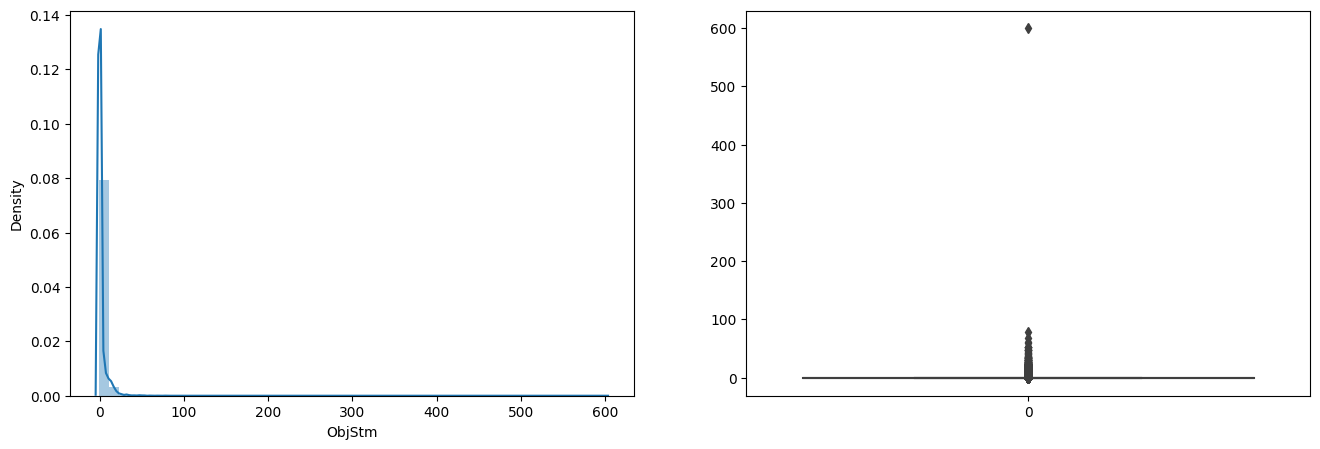

In [58]:
analysis('ObjStm')


#### Analysis JS

Value Count
0        5204
1        2879
2         802
-1        541
1(1)      226
3         171
5         102
4          58
6           5
8           3
0           3
20          3
2(2)        2
38          2
9           2
13          2
12          2
16          2
149         2
19          2
404         1
30          1
110         1
34          1
32          1
29(2)       1
71          1
15          1
14          1
7           1
52          1
44          1
63          1
Name: JS, dtype: int64

Data Describe
count     10026
unique       33
top           0
freq       5204
Name: JS, dtype: object

Other Data Type :
JS     value
-1     False    541
1(1)   False    226
2(2)   False      2
29(2)  False      1
dtype: int64


<ipython-input-17-7f359b4b198d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[header])


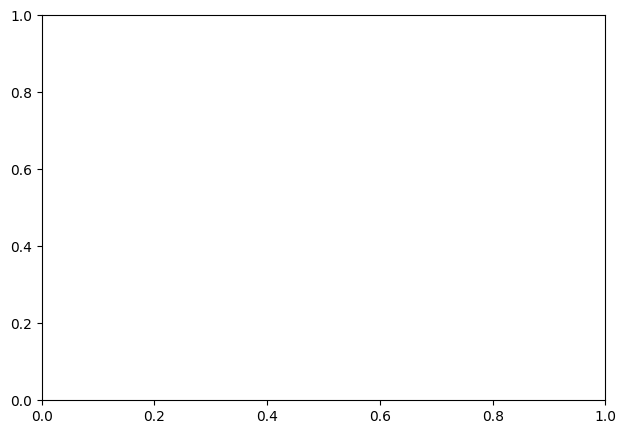

In [59]:
analysis('JS')


#### Analysis Javascript

Value Count
0        5098
1        2078
2        1107
3         708
-1        541
4         192
6         108
1(1)       79
5          39
2(1)       21
>          13
7           4
13          4
0           3
16          3
19          2
20          2
149         2
9           2
3(1)        2
8           2
10          2
39          1
44          1
53          1
15          1
38          1
31          1
34          1
111         1
404         1
21          1
72          1
2(2)        1
34(2)       1
63          1
Name: Javascript, dtype: int64

Data Describe
count     10026
unique       36
top           0
freq       5098
Name: Javascript, dtype: object

Other Data Type :
Javascript  value
-1          False    541
1(1)        False     79
2(1)        False     21
>           False     13
3(1)        False      2
2(2)        False      1
34(2)       False      1
dtype: int64


<ipython-input-17-7f359b4b198d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[header])


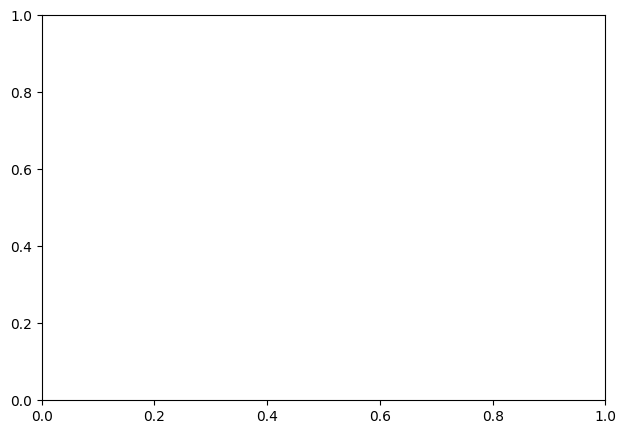

In [60]:
analysis('Javascript')


#### Analysis AA

Value Count
0       8964
-1       554
1        385
2         33
1(1)      14
3          8
4          6
10         6
8          4
13         4
12         4
47         3
11         3
0          3
7          3
23         2
17         2
115        2
9          2
21         2
15         2
52         1
33         1
133        1
24         1
66         1
60         1
183        1
198        1
213        1
61         1
49         1
31         1
132        1
40         1
18         1
22         1
14         1
207        1
182        1
151        1
Name: AA, dtype: int64

Data Describe
count     10026
unique       41
top           0
freq       8964
Name: AA, dtype: object

Other Data Type :
AA    value
-1    False    554
1(1)  False     14
dtype: int64


<ipython-input-17-7f359b4b198d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[header])


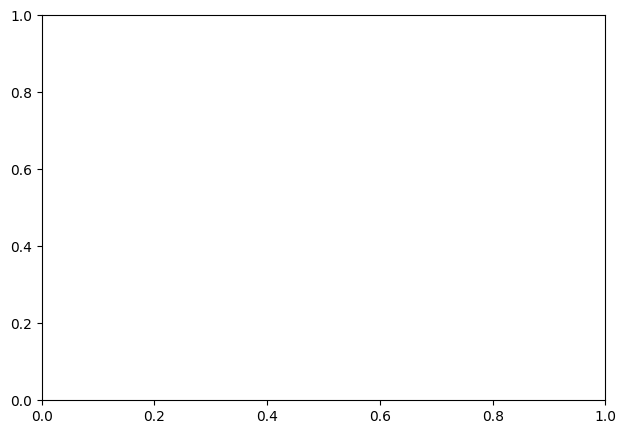

In [61]:
analysis('AA')


#### Analysisi Open action

Value Count
0        6393
1        2927
-1        554
1(1)       87
2          53
3           6
0           3
4           2
12(2)       1
Name: OpenAction, dtype: int64

Data Describe
count     10026
unique        9
top           0
freq       6393
Name: OpenAction, dtype: object

Other Data Type :
OpenAction  value
-1          False    554
1(1)        False     87
12(2)       False      1
dtype: int64


<ipython-input-17-7f359b4b198d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[header])


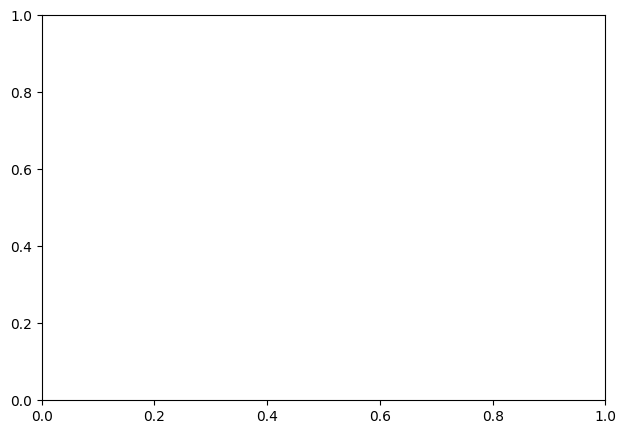

In [62]:
analysis('OpenAction')


#### Analysis Acroform


Value Count
0       6432
1       2265
2        665
-1       554
3         76
1(1)      13
4         12
0          3
5          3
6          2
8          1
Name: Acroform, dtype: int64

Data Describe
count     10026
unique       11
top           0
freq       6432
Name: Acroform, dtype: object

Other Data Type :
Acroform  value
-1        False    554
1(1)      False     13
dtype: int64


<ipython-input-17-7f359b4b198d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[header])


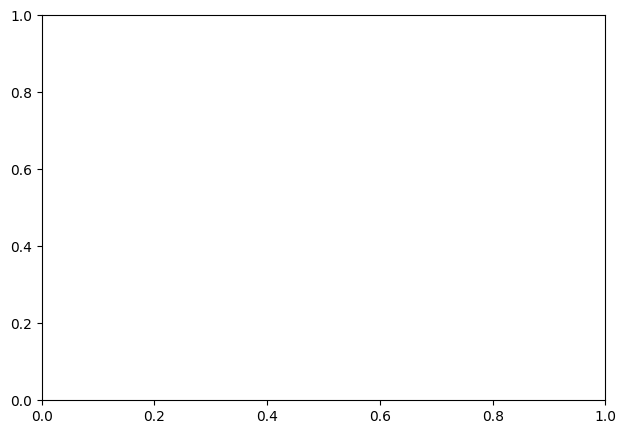

In [63]:
analysis('Acroform')


#### Analysis JBIG2Decode

Value Count
0       9320
-1       554
1         81
4         14
2          9
3          9
5          7
1(1)       6
6          6
11         5
9          3
0          3
13         3
7          3
12         1
8          1
14         1
Name: JBIG2Decode, dtype: int64

Data Describe
count     10026
unique       17
top           0
freq       9320
Name: JBIG2Decode, dtype: object

Other Data Type :
JBIG2Decode  value
-1           False    554
1(1)         False      6
dtype: int64


<ipython-input-17-7f359b4b198d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[header])


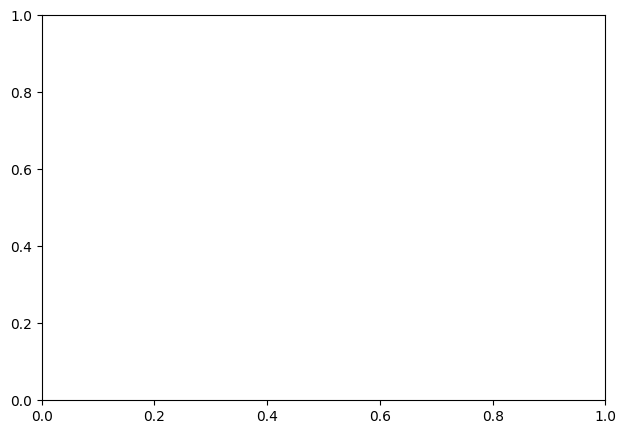

In [64]:
analysis('JBIG2Decode')


#### Analysis RichMedia

Value Count
0       9417
-1       554
1         39
2          6
4          3
0          3
1(1)       3
2(2)       1
Name: RichMedia, dtype: int64

Data Describe
count     10026
unique        8
top           0
freq       9417
Name: RichMedia, dtype: object

Other Data Type :
RichMedia  value
-1         False    554
1(1)       False      3
2(2)       False      1
dtype: int64


<ipython-input-17-7f359b4b198d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[header])


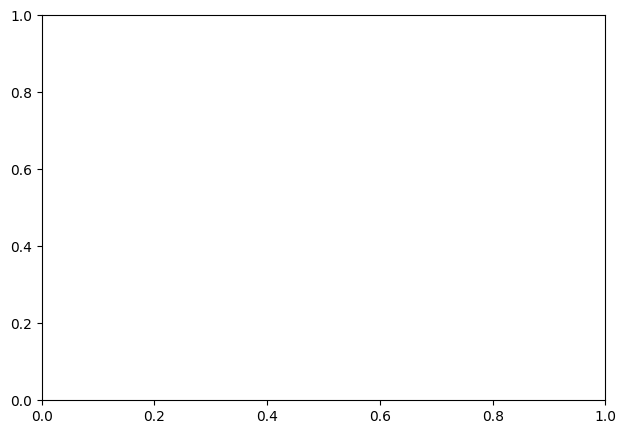

In [65]:
analysis('RichMedia')


#### Analysis launch

Value Count
0       9339
-1       554
1        116
1(1)      10
2          4
0          3
Name: launch, dtype: int64

Data Describe
count     10026
unique        6
top           0
freq       9339
Name: launch, dtype: object

Other Data Type :
launch  value
-1      False    554
1(1)    False     10
dtype: int64


<ipython-input-17-7f359b4b198d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[header])


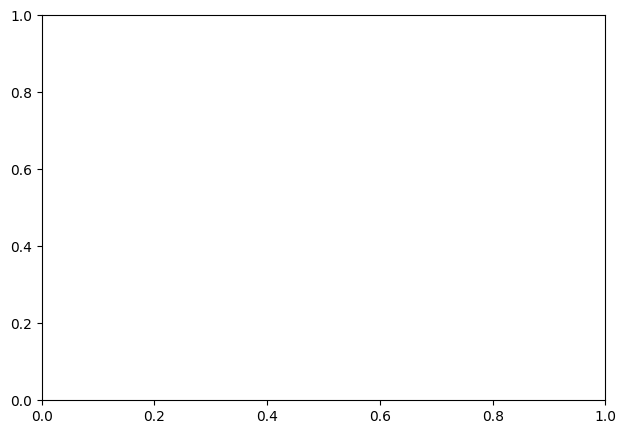

In [66]:
analysis('launch')


#### Analysis EmbeddedFile

Value Count
0        8644
-1        554
8         444
1         151
9          87
10         38
11         34
1(1)       32
6          18
2           7
0           3
12          3
5           2
3           2
13          2
12(2)       1
4           1
17          1
14          1
15          1
Name: EmbeddedFile, dtype: int64

Data Describe
count     10026
unique       20
top           0
freq       8644
Name: EmbeddedFile, dtype: object

Other Data Type :
EmbeddedFile  value
-1            False    554
1(1)          False     32
12(2)         False      1
dtype: int64


<ipython-input-17-7f359b4b198d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[header])


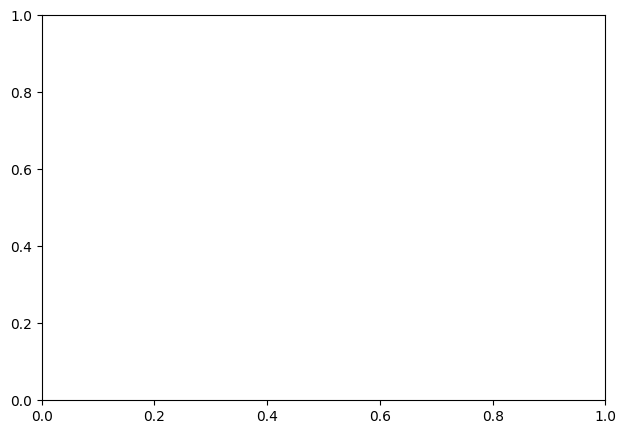

In [67]:
analysis('EmbeddedFile')


#### Analysis XFA

Value Count
0       8953
-1       554
1        475
1(1)      20
2         19
0          3
4          1
5          1
Name: XFA, dtype: int64

Data Describe
count     10026
unique        8
top           0
freq       8953
Name: XFA, dtype: object

Other Data Type :
XFA   value
-1    False    554
1(1)  False     20
dtype: int64


<ipython-input-17-7f359b4b198d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[header])


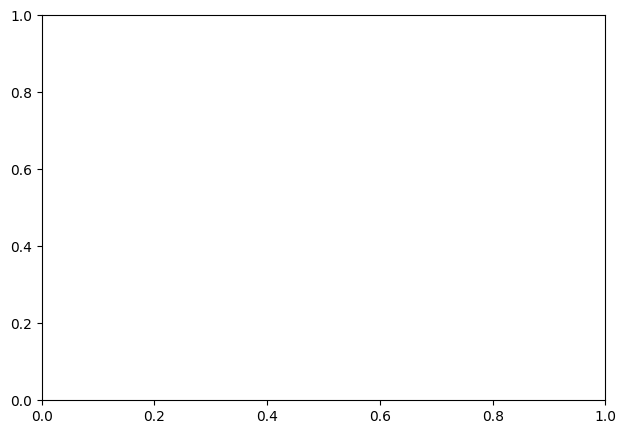

In [68]:
analysis('XFA')


#### Aalysis Colors

Value Count
 0.0      8647
-1.0       564
 2.0       272
 4.0       130
 6.0        65
          ... 
 9.0         1
 52.0        1
 122.0       1
 54.0        1
 166.0       1
Name: Colors, Length: 62, dtype: int64

Data Describe
count    10026.000000
mean         2.086375
std         58.169380
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       5682.000000
Name: Colors, dtype: float64

Other Data Type :
Not contain Other Dtype


<ipython-input-17-7f359b4b198d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[header])


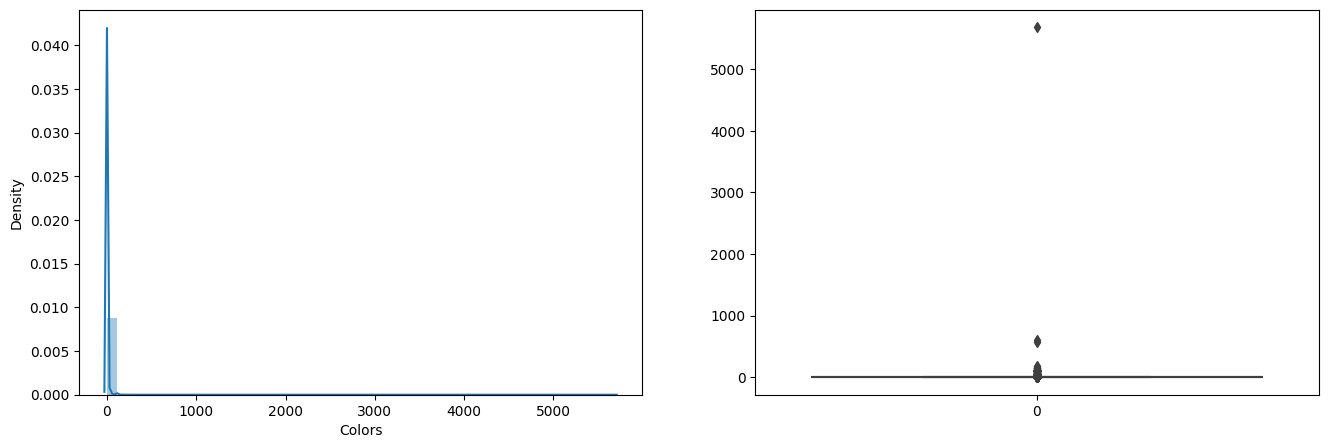

In [69]:
analysis('Colors')


#### Analysis Class

Value Count
Malicious    5557
Benign       4468
0               1
Name: Class, dtype: int64

Data Describe
count         10026
unique            3
top       Malicious
freq           5557
Name: Class, dtype: object

Other Data Type :
Class      value
Malicious  False    5557
Benign     False    4468
dtype: int64


<ipython-input-17-7f359b4b198d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[header])


<Axes: >

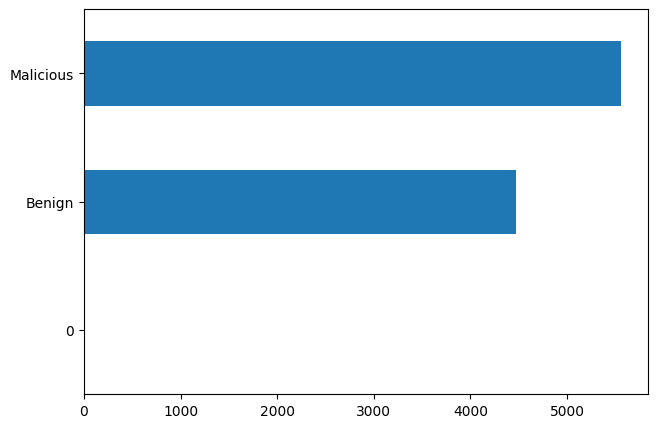

In [70]:
analysis('Class')
df['Class'].value_counts().sort_values().plot(kind='barh')
# plt.show()

#### SUMMARY

Kesimpulan proses yang akan dilakukan berdasarkan kolom


|Column Name|Action Needed|
|---|---|
|Images | Merubah -1 menjadi integer, 1(1) menjadi 1|
|Text | merubah No|0,Yes|1,Unclear|-1,dan -1 menjadi integer + label encoder|
|Header | hanya mengambil \t%PDF-%i.%i (%i adalah integer), if not make it -1 (integer) + label encoder|
|Obj | make -1 and other datatypes to -1 Integer|
|endobj | -1 to integer, "pdfid.py" to -1 or drop|
|endstream | -1 to integer, pdfheader | to -1 or drop, 1(1) to 1|
| xref |  -1 to integer, "pdfid.py" to -1 or drop|
|startxref |  -1 to integer, "bytes[endheader]" to -1 or drop|
|pageno | only get the integer before "(", -1 to integer, "list" to -1 or drop|
|JS | only get the integer before "("|
|javascript | only get the integer before "(" , ">" to -1 or drop|
|AA | -1 to integer, 1(1) to 1|
|OpenAction | only get the integer before "(", -1 to integer|
|Acroform | only get the integer before "(", -1 to integer|
|JBIG2Decode | only get the integer before "(", -1 to integer|
|RichMedia | only get the integer before "(", -1 to integer|
|launch | only get the integer before "(", -1 to integer|
|Embedded file | only get the integer before "(", -1 to integer|
|XFA | only get the integer before "(", -1 to integer|
|Class | Label Encdoing|


---
Kesimpulan Berdasarkan aksi yang akan dilakukan 


| Action | Column Name |
|--------|-------------|
| -1 to Integer | ["Images", "Text", "Header","Obj","endobj","endstream","xref","startxref","pageno","JS","Javascript","AA","OpenAction","Acroform","JBIG2Decode","RichMedia","launch","EmbeddedFile","XFA"] |
| Get Integer before "(" | ["Images","endstream","pageno","JS","Javascript","AA","OpenAction","Acroform","JBIG2Decode","RichMedia","launch","EmbeddedFile","XFA"]|
|Other Datatype to -1 or Drop | ["Header","Obj","endobj","endstream","xref","startxref","Javascript",]
|Regex \t%PDF-%i.%i (%i adalah integer) | ["header"]|
|One Hot Encoding| ["text"] | 
|Label Encoding|  ["Header","Class"]

### Data Cleaning

#### Checking and Cleaning Null Value


In [71]:
#Filling Null Value with zero
df.fillna(0, inplace = True)
df.isnull().sum()

pdfsize             0
metadata size       0
pages               0
xref Length         0
title characters    0
isEncrypted         0
embedded files      0
images              0
text                0
header              0
obj                 0
endobj              0
stream              0
endstream           0
xref                0
trailer             0
startxref           0
pageno              0
encrypt             0
ObjStm              0
JS                  0
Javascript          0
AA                  0
OpenAction          0
Acroform            0
JBIG2Decode         0
RichMedia           0
launch              0
EmbeddedFile        0
XFA                 0
Colors              0
Class               0
dtype: int64

#### Convert -1 to Integer

In [72]:
integer_column = ["images", "text", "header","obj","endobj","endstream","xref","startxref","pageno","JS","Javascript","AA","OpenAction","Acroform","JBIG2Decode","RichMedia","launch","EmbeddedFile","XFA"]
df_test = df[integer_column].applymap(lambda x: -1 if x == '-1' else x)

header = "obj"
print("Value Count")
print(df_test[header].value_counts())
print("\nData Describe")
print(df_test[header].describe())
print("\nOther Data Type :")
col = header
try:
  df_test[col].str.isnumeric() 
  df_temp_numeric = df_test[col].str.isnumeric()
  df_temp_numeric = pd.concat({col:df[col],'value':df_temp_numeric},axis=1)
  print(df_temp_numeric.query("`value` == False").value_counts())
except:
  print("Not contain Other Dtype")

Value Count
9       1182
-1       770
8        722
11       414
6        411
        ... 
243        1
1973       1
795        1
774        1
1099       1
Name: obj, Length: 480, dtype: int64

Data Describe
count     10026
unique      480
top           9
freq       1182
Name: obj, dtype: object

Other Data Type :
obj               value
(most             False    22
_Pro_Rodeo_Pix_   False     1
_Pro_Rodeo_Pix_'  False     1
dtype: int64


Value Count
9       1182
-1       770
8        722
11       414
6        411
        ... 
243        1
1973       1
795        1
774        1
1099       1
Name: obj, Length: 480, dtype: int64

Data Describe
count     10026
unique      480
top           9
freq       1182
Name: obj, dtype: object

Other Data Type :
obj               value
(most             False    22
_Pro_Rodeo_Pix_   False     1
_Pro_Rodeo_Pix_'  False     1
dtype: int64


<ipython-input-17-7f359b4b198d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[header])


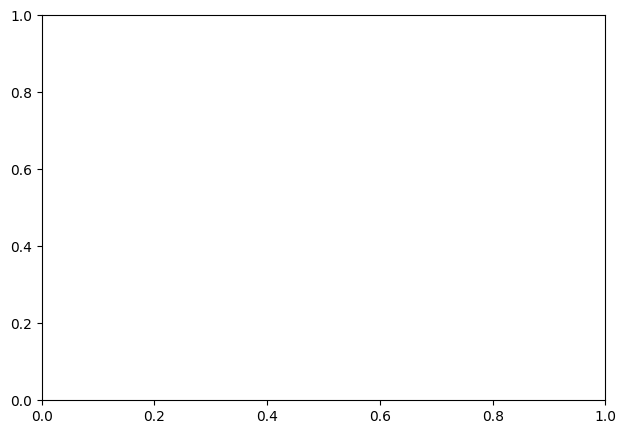

In [73]:
df[integer_column] = df_test
analysis('obj')

#### Getting integer before '('

In [74]:
parentheses_column = ["images","endstream","pageno","JS","Javascript","AA","OpenAction","Acroform","JBIG2Decode","RichMedia","launch","EmbeddedFile","XFA"]
def get_parentheses(x):
  try :
    if '(' in x:
      matches = re.findall(r"\d+(?=\()", x)
      return int(matches[0])
    else:
      return x
  except:
    return x

df_test = df[parentheses_column].applymap(lambda x: get_parentheses(x))

header = "Javascript"
col = header
df_test[col].str.isnumeric() 
df_temp_numeric = df_test[col].str.isnumeric()
df_temp_numeric = pd.concat({col:df[col],'value':df_temp_numeric},axis=1)
print(df_temp_numeric.query("`value` == False").value_counts())


Javascript  value
>           False    13
dtype: int64


Value Count
0      5098
1      2078
2      1107
3       708
-1      541
4       192
6       108
1        79
5        39
2        22
>        13
7         4
13        4
0         3
16        3
3         2
149       2
9         2
8         2
19        2
10        2
20        2
38        1
39        1
44        1
53        1
15        1
34        1
111       1
31        1
404       1
21        1
72        1
34        1
63        1
Name: Javascript, dtype: int64

Data Describe
count     10026
unique       35
top           0
freq       5098
Name: Javascript, dtype: object

Other Data Type :
Javascript  value
>           False    13
dtype: int64


<ipython-input-17-7f359b4b198d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[header])


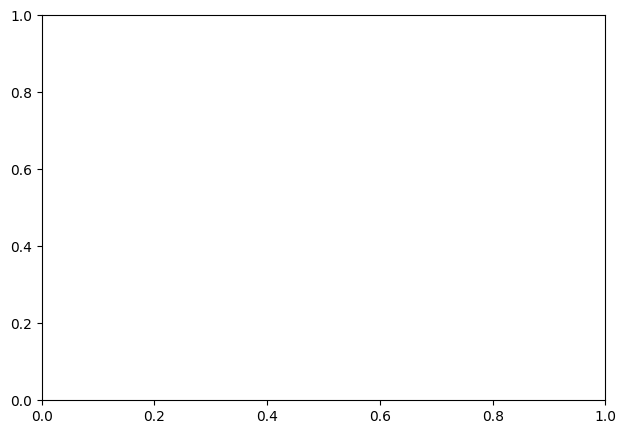

In [75]:
df[parentheses_column] = df_test
analysis('Javascript')

#### Regex Header Column

Regex \t%PDF-%i.%i (%i adalah integer)


In [76]:
def match_header(x):
  match = False
  try:
    match = re.fullmatch(r"\t%PDF-\d.\d", x)
  except:
    return -1

  if match:
    header = re.findall(r"\t%PDF-\d.\d", x)
    return header[0]
  else:
    return -1


In [77]:
df[['header']]

,header
0,\t%PDF-1.3
1,\t%PDF-1.6
2,\t%PDF-1.3
3,\t%PDF-1.3
4,\t%PDF-1.3
...,...
10021,\t%PDF-1.3
10022,\t%PDF-\x07.3
10023,\t%PDF-1.3
10024,\t%PDF-1.3


In [78]:
df_test = df[['header']].applymap(lambda x: match_header(x))

header = "header"
col = header
df_test[col].str.isnumeric() 
df_temp_numeric = df_test[col].str.isnumeric()
df_temp_numeric = pd.concat({col:df[col],'value':df_temp_numeric},axis=1)
print(df_temp_numeric.query("`value` == False").value_counts())

header      value
\t%PDF-1.3  False    2347
\t%PDF-1.4  False    1911
\t%PDF-1.7  False    1604
\t%PDF-1.6  False    1190
\t%PDF-1.2  False     688
\t%PDF-1.5  False     536
\t%PDF-1.0  False     331
\t%PDF-1.1  False     223
\t%PDF-0.9  False       4
\t%PDF-1.8  False       1
\t%PDF-2.4  False       1
dtype: int64


Value Count
\t%PDF-1.3    2347
\t%PDF-1.4    1911
\t%PDF-1.7    1604
\t%PDF-1.6    1190
-1            1190
\t%PDF-1.2     688
\t%PDF-1.5     536
\t%PDF-1.0     331
\t%PDF-1.1     223
\t%PDF-0.9       4
\t%PDF-2.4       1
\t%PDF-1.8       1
Name: header, dtype: int64

Data Describe
count          10026
unique            12
top       \t%PDF-1.3
freq            2347
Name: header, dtype: object

Other Data Type :
header      value
\t%PDF-1.3  False    2347
\t%PDF-1.4  False    1911
\t%PDF-1.7  False    1604
\t%PDF-1.6  False    1190
\t%PDF-1.2  False     688
\t%PDF-1.5  False     536
\t%PDF-1.0  False     331
\t%PDF-1.1  False     223
\t%PDF-0.9  False       4
\t%PDF-1.8  False       1
\t%PDF-2.4  False       1
dtype: int64


<ipython-input-17-7f359b4b198d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[header])


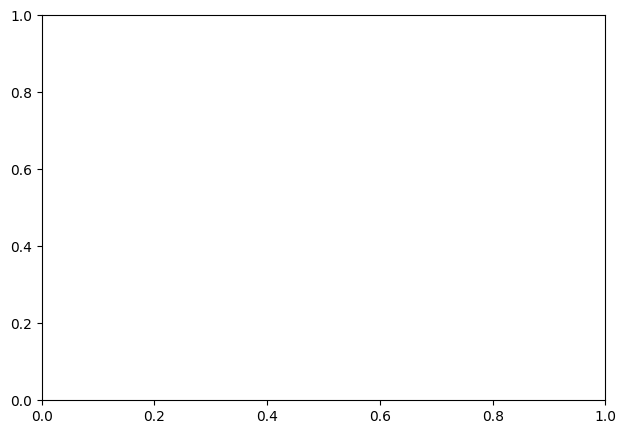

In [79]:
df['header'] = df_test
analysis('header')

#### Handling Other Datatype

In [80]:
other = ["obj","endobj","endstream","xref","startxref","pageno","Javascript"]

##### Making other datatype to -1

In [81]:
# Geting list of other datatype value
def other_data(col):
  other_data_value = []
  df_test[col].str.isnumeric() 
  df_temp_numeric = df_test[col].str.isnumeric()
  df_temp_numeric = pd.concat({col:df[col],'value':df_temp_numeric},axis=1)
  for i in df_temp_numeric.query("`value` == False").value_counts().index:
    other_data_value.append(i[0])
  return other_data_value

def replace_other_data(x):
  if x in other_data_value:
    return -1
  else:
    return x 

In [82]:
df_test = df[other]

In [83]:
other_data_value = []
for col in other:
  s_numeric = pd.to_numeric(df_test[col], errors='coerce')
  # Check which values are not numeric
  non_numeric_values = df_test[col][s_numeric.isna()]
  other_data_value.append(non_numeric_values.value_counts().index[0])


In [84]:
print(other_data_value)

['(most', 'pdfid.py', 'pdfHeader)', 'pdfid.py', 'bytes[endHeader]', 'list', '>']


In [85]:
for i in other:
  df_test[i] = df_test[i].map(lambda x: replace_other_data(x))

<ipython-input-85-60c8c5cef208>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[i] = df_test[i].map(lambda x: replace_other_data(x))


In [86]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10026 entries, 0 to 10025
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   obj         10026 non-null  object
 1   endobj      10026 non-null  object
 2   endstream   10026 non-null  object
 3   xref        10026 non-null  object
 4   startxref   10026 non-null  object
 5   pageno      10026 non-null  object
 6   Javascript  10026 non-null  object
dtypes: object(7)
memory usage: 548.4+ KB


In [87]:
for col in other:
    df_test[col].str.isnumeric()
    df_temp_numeric = df_test[col].str.isnumeric()
    df_temp_numeric = pd.concat({col:df[col],'value':df_temp_numeric},axis=1)
    print(df_temp_numeric.query("`value` == False").value_counts())


obj               value
_Pro_Rodeo_Pix_   False    1
_Pro_Rodeo_Pix_'  False    1
dtype: int64
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)


Membersihkan yang tersisa

In [88]:
pecilan = ["_Pro_Rodeo_Pix_","_Pro_Rodeo_Pix_'","(most"]
df_test['obj'] = df_test['obj'].map(lambda x: -1 if x in pecilan else x)

<ipython-input-88-7f32e49e7623>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['obj'] = df_test['obj'].map(lambda x: -1 if x in pecilan else x)


In [89]:
for col in other:
    df_test[col].str.isnumeric()
    df_temp_numeric = df_test[col].str.isnumeric()
    df_temp_numeric = pd.concat({col:df[col],'value':df_temp_numeric},axis=1)
    print(df_temp_numeric.query("`value` == False").value_counts())

Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)


In [90]:
df[other] = df_test[other]

#### Label Encoder

In [91]:
head = {-1:-1,'%PDF-0.1': 1, '%PDF-0.2': 2, '%PDF-0.3': 3, '%PDF-0.4': 4, '%PDF-0.5': 5, '%PDF-0.6': 6, '%PDF-0.7': 7, '%PDF-0.8': 8, '%PDF-0.9': 9, '%PDF-1.0': 10, '%PDF-1.1': 11, '%PDF-1.2': 12, '%PDF-1.3': 13, '%PDF-1.4': 14, '%PDF-1.5': 15, '%PDF-1.6': 16, '%PDF-1.7': 17, '%PDF-1.8': 18, '%PDF-1.9': 19, '%PDF-2.0': 20, '%PDF-2.1': 21, '%PDF-2.2': 22, '%PDF-2.3': 23, '%PDF-2.4': 24}
head_match = None
def match_header(x):
  head_match = None
  for i in head.keys():
    if x == -1:
      continue
    if i == -1:
      continue
    if i in x:
      head_match = i
      break
  
  if head_match == None:
    return -1

  return head[head_match]   


In [92]:
df['header'].value_counts()

\t%PDF-1.3    2347
\t%PDF-1.4    1911
\t%PDF-1.7    1604
\t%PDF-1.6    1190
-1            1190
\t%PDF-1.2     688
\t%PDF-1.5     536
\t%PDF-1.0     331
\t%PDF-1.1     223
\t%PDF-0.9       4
\t%PDF-2.4       1
\t%PDF-1.8       1
Name: header, dtype: int64

In [93]:
df[['header']] = df[['header']].applymap(lambda x: match_header(x))

#### One Hot Encoding

In [94]:
for i in df['text'].value_counts().index:
  print(i)

No
Yes
unclear
-1
0
0


In [95]:
text = {'No':0,"Yes":1,"unclear":-1}
def text_encoding(x):
  if x == 0:
    return 0
  try :
    if '0' in x:
      return 0
  except:
    pass
    
  try:
    return text[x]
  except:
    return x
df['text'] = df['text'].map(lambda x: text_encoding(x))
df_onehot = pd.get_dummies(df, columns=['text'])
df_ready = df_onehot

### Data Summary

In [96]:
df['text'].value_counts()

 0    5414
 1    3761
-1     851
Name: text, dtype: int64

In [97]:
df_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10026 entries, 0 to 10025
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pdfsize           10026 non-null  float64
 1   metadata size     10026 non-null  float64
 2   pages             10026 non-null  float64
 3   xref Length       10026 non-null  float64
 4   title characters  10026 non-null  float64
 5   isEncrypted       10026 non-null  float64
 6   embedded files    10026 non-null  float64
 7   images            10026 non-null  object 
 8   header            10026 non-null  int64  
 9   obj               10026 non-null  object 
 10  endobj            10026 non-null  object 
 11  stream            10026 non-null  float64
 12  endstream         10026 non-null  object 
 13  xref              10026 non-null  object 
 14  trailer           10026 non-null  float64
 15  startxref         10026 non-null  object 
 16  pageno            10026 non-null  object

In [98]:
df_ready

,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,header,obj,...,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class,text_-1,text_0,text_1
0,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,13,10,...,0,0,0,0,0,0.0,Malicious,0,1,0
1,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,16,19,...,0,0,0,8,1,0.0,Malicious,0,1,0
2,4.0,468.0,1.0,13.0,16.0,0.0,0.0,0,13,12,...,0,0,0,0,0,0.0,Malicious,0,0,1
3,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,13,14,...,0,0,0,0,0,0.0,Malicious,0,1,0
4,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,13,15,...,0,0,0,0,0,0.0,Malicious,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,529.0,296.0,1.0,87.0,8.0,0.0,0.0,3,13,9,...,0,0,0,0,0,0.0,Malicious,0,1,0
10022,73.0,314.0,1.0,16.0,3.0,0.0,0.0,-1,-1,8,...,0,0,0,0,0,0.0,Malicious,1,0,0
10023,4.0,377.0,2.0,13.0,11.0,0.0,0.0,0,13,8,...,0,0,0,0,0,0.0,Malicious,0,0,1
10024,38.0,338.0,1.0,200006.0,13.0,0.0,0.0,0,13,9,...,0,0,0,0,0,0.0,Malicious,0,0,1


In [99]:
for i in df_ready:
  if i == "Class":
    continue
  df_ready[i] = df_ready[i].astype(float)

In [100]:
df_ready['Class'].value_counts()

Malicious    5557
Benign       4468
0               1
Name: Class, dtype: int64

In [101]:
df_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10026 entries, 0 to 10025
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pdfsize           10026 non-null  float64
 1   metadata size     10026 non-null  float64
 2   pages             10026 non-null  float64
 3   xref Length       10026 non-null  float64
 4   title characters  10026 non-null  float64
 5   isEncrypted       10026 non-null  float64
 6   embedded files    10026 non-null  float64
 7   images            10026 non-null  float64
 8   header            10026 non-null  float64
 9   obj               10026 non-null  float64
 10  endobj            10026 non-null  float64
 11  stream            10026 non-null  float64
 12  endstream         10026 non-null  float64
 13  xref              10026 non-null  float64
 14  trailer           10026 non-null  float64
 15  startxref         10026 non-null  float64
 16  pageno            10026 non-null  float6

---
# Pemodelan

In [102]:
label = {"Malicious":1,"Benign":0,0:0}
df = df_ready
df["Class"] = df_ready["Class"].map(lambda x: label[x])
train, valid = train_test_split(df, test_size=0.2,random_state=20)

y = train['Class']

X = train.drop(["Class"],axis=1)
# label = {0:'Benign',1:'Malicious'}
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=20,train_size=0.7, shuffle=True)

In [103]:
df_ready

,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,header,obj,...,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class,text_-1,text_0,text_1
0,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0.0,13.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0
1,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0.0,16.0,19.0,...,0.0,0.0,0.0,8.0,1.0,0.0,1,0.0,1.0,0.0
2,4.0,468.0,1.0,13.0,16.0,0.0,0.0,0.0,13.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0
3,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0.0,13.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0
4,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0.0,13.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,529.0,296.0,1.0,87.0,8.0,0.0,0.0,3.0,13.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0
10022,73.0,314.0,1.0,16.0,3.0,0.0,0.0,-1.0,-1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0
10023,4.0,377.0,2.0,13.0,11.0,0.0,0.0,0.0,13.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0
10024,38.0,338.0,1.0,200006.0,13.0,0.0,0.0,0.0,13.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0


### Gradient Boosting Classifier

In [104]:
gb_result_columns = ["N Estimator","Learning Rate","Max Depth","F1 Score","Accuracy"]
gb_result = pd.DataFrame(columns = gb_result_columns)

In [105]:
gb_result

,N Estimator,Learning Rate,Max Depth,F1 Score,Accuracy


In [106]:
# Gradient Boosting Classifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
n_estimators_ls=[10,20,50,70, 100, 200, 300]
max_depth_ls=[1,2,3]
results = {}
for learning_rate in lr_list:  
  for n_estimator in n_estimators_ls:
    for n_max_depth in max_depth_ls:
      gb_clf = GradientBoostingClassifier(n_estimators=n_estimator, learning_rate=learning_rate, max_features=3, max_depth=n_max_depth, random_state=0)
      gb_clf.fit(X_train, y_train)
      predictions = gb_clf.predict(X_test)

      # print(f"Classification Report for LR = {learning_rate} and NE = {n_estimator}")
      # print(classification_report(y_test, predictions))
      accuracy = gb_clf.score(X_test, y_test) 
      f1 = f1_score(y_test, predictions)
      # print(f"F1 Score : {f1}")
      # results[learning_rate] = accuracy
      # print(f"Accuracy : {results[learning_rate]}\n\n")
      list_result = [learning_rate, n_estimator,n_max_depth, f1,accuracy]
      gb_result.loc[len(gb_result)] = list_result
      


In [107]:
gb_result

,N Estimator,Learning Rate,Max Depth,F1 Score,Accuracy
0,0.05,10.0,1.0,0.875862,0.850374
1,0.05,10.0,2.0,0.895470,0.875312
2,0.05,10.0,3.0,0.970348,0.966750
3,0.05,20.0,1.0,0.891061,0.870324
4,0.05,20.0,2.0,0.928416,0.917706
...,...,...,...,...,...
142,1.00,200.0,2.0,0.956264,0.950956
143,1.00,200.0,3.0,0.995176,0.994597
144,1.00,300.0,1.0,0.991834,0.990856
145,1.00,300.0,2.0,0.732170,0.636326


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [108]:
gb_result.sort_values(by=['Accuracy'],ascending=False)
gb_result.to_excel("GB_Result.xlsx")

In [109]:
gb_clf_export = GradientBoostingClassifier(n_estimators=70, learning_rate=0.05, max_features=3, max_depth=3, random_state=0)
gb_clf_export.fit(X_train, y_train)
joblib.dump(gb_clf_export, 'model_gb.pkl')

['model_gb.pkl']

In [110]:
entry = df_ready.iloc[7519]
entry = entry.drop(labels=["Class"])
csv = pd.DataFrame(entry).T
csv.to_csv( 'entry.csv',index=False )

In [111]:
test = pd.DataFrame(entry)
test = test.transpose()
test.to_csv("entry.csv", index=False, header=True)

In [112]:
a = gb_clf_export.predict(test)



In [113]:
a

array([0])

In [114]:
entry.to_csv("entry.csv", index=True, header=True)




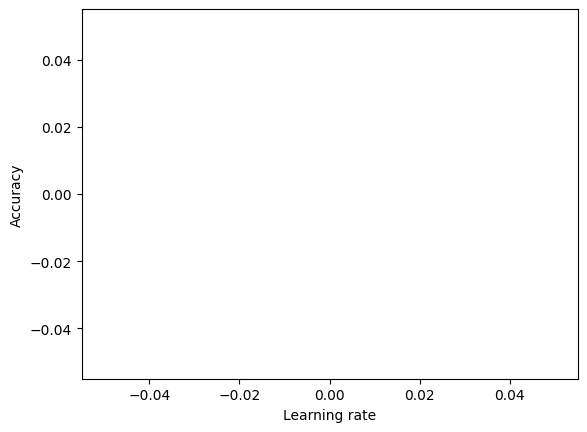

In [115]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.show()

#### Hasil terbaik Gradient Boosing

```
Classification Report for LR = 0.75 and NE = 300
F1 Score : 0.9963724304715841
Accuracy : 0.9960106382978723
```




### Extreme Gradient Boosting


In [116]:
xgb_result_columns = ["Learning Rate","subsample","Gamma","Max Depth","Min_Child_weight","Colsample_bytree","F1 Score","Accuracy"]
xgb_result = pd.DataFrame(columns = xgb_result_columns)

In [117]:
import itertools

In [118]:
# Convert the training data to DMatrix format
dtrain = xgb.DMatrix(data=X_train, label=y_train)

# Convert the test data to DMatrix format
dtest = xgb.DMatrix(data=X_test, label=y_test)

lr_list = np.arange(0.005, 0.2,0.005)
subsample_ls = np.arange(0.8,1,0.1)
gamma_ls = np.arange(0,2,1)
max_depth_ls = np.arange(5,30,5)
min_child_weight_ls = np.arange(1,10,1)
colsample_bytree_ls = np.arange(0.8, 1,0.1)


for lr,subsample,gamma,max_depth,min_child_weight,colsample_bytree in itertools.product(lr_list,subsample_ls,gamma_ls,max_depth_ls,min_child_weight_ls,colsample_bytree_ls):
  # Set the training parameters
  param = {'objective': 'binary:logistic', 'eval_metric': 'error',"gamma":gamma,'eta':lr,"min_child_weight":min_child_weight, "max_depth":max_depth,"subsample":subsample,"colsample_bytree":colsample_bytree}

  # Train the model
  bst = xgb.train(param, dtrain)

  # Make predictions on the test set
  predictions = bst.predict(dtest)
  predictions = [round(x) for x in predictions]
  # Print the F1 score and accuracy
  # print(f"Learning rate {lr}")
  # print("F1 score: ", f1_score(y_test, predictions))
  # print("Accuracy: ", accuracy_score(y_test, predictions))
  list_result = [lr,subsample,gamma,max_depth,min_child_weight,colsample_bytree, f1_score(y_test, predictions),accuracy_score(y_test, predictions)]
  xgb_result.loc[len(xgb_result)] = list_result

xgb_result.to_excel("XGB_Result.xlsx")

In [119]:
xgb_result.sort_values(by=['Accuracy'],ascending=False)
xgb_result.to_excel("XGB_Result.xlsx")

In [120]:
xgb_result.sort_values(by=['Accuracy'],ascending=False)

,Learning Rate,subsample,Gamma,Max Depth,Min_Child_weight,Colsample_bytree,F1 Score,Accuracy
12078,0.170,0.9,0.0,10.0,1.0,0.8,0.991828,0.990856
12474,0.175,0.9,0.0,20.0,1.0,0.8,0.991828,0.990856
12459,0.175,0.9,0.0,15.0,2.0,0.9,0.991828,0.990856
12456,0.175,0.9,0.0,15.0,1.0,0.8,0.991828,0.990856
12114,0.170,0.9,0.0,20.0,1.0,0.8,0.991828,0.990856
...,...,...,...,...,...,...,...,...
107,0.005,0.8,1.0,5.0,9.0,0.9,0.975592,0.972569
373,0.010,0.8,0.0,5.0,7.0,0.9,0.975646,0.972569
112,0.005,0.8,1.0,10.0,3.0,0.8,0.975592,0.972569
120,0.005,0.8,1.0,10.0,7.0,0.8,0.975592,0.972569


In [121]:
param = {'objective': 'binary:logistic', 'eval_metric': 'error','eta':1}
# Train the model
bst = xgb.train(param, dtrain)
bst.save_model("model.txt")

### Multilayer Perceptron

In [122]:
mlp_result_column = ['Activation Function', 'Loss Function','Alpha','F1 Score','Accuracy']
mlp_result = pd.DataFrame(columns = mlp_result_column)

In [123]:
activation_function_ls = ['logistic','tanh','relu']
solver_ls = ['lbfgs','sgd','adam']
alpha_ls = [0.1, 0.01, 0.001, 0.0001]

In [124]:
for activation_function, solver_, alpha_ in itertools.product(activation_function_ls,solver_ls,alpha_ls):
  # Define the model
  mlp = MLPClassifier(activation=activation_function, hidden_layer_sizes=(100, 100), max_iter=400, alpha=alpha_,
                      solver=solver_, tol=1e-4, random_state=1)

  # Train the model
  mlp.fit(X_train, y_train)
  y_pred = mlp.predict(X_test)

  # Calculate the accuracy
  accuracy = accuracy_score(y_test, y_pred)

  # Calculate the F1 score
  f1 = f1_score(y_test, y_pred)
  list_result = [activation_function, solver_, alpha_, f1,accuracy]
  mlp_result.loc[len(mlp_result)] = list_result
  # print("Accuracy: {:.3f}".format(accuracy))
  # print("F1 Score: {:.3f}".format(f1))

mlp_result.sort_values(by=['Accuracy'],ascending=False)
mlp_result.to_excel("MLP_Result.xlsx")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

In [125]:
mlp_result.sort_values(by=['Accuracy'],ascending=False)

,Activation Function,Loss Function,Alpha,F1 Score,Accuracy
8,logistic,adam,0.1000,0.988897,0.987531
11,logistic,adam,0.0001,0.987764,0.986284
10,logistic,adam,0.0010,0.986261,0.984622
23,tanh,adam,0.0001,0.985240,0.983375
9,logistic,adam,0.0100,0.984281,0.982544
21,tanh,adam,0.0100,0.984080,0.982128
22,tanh,adam,0.0010,0.980553,0.978387
20,tanh,adam,0.1000,0.978261,0.975894
32,relu,adam,0.1000,0.978503,0.975894
25,relu,lbfgs,0.0100,0.977794,0.975062


In [126]:
# param_grid = {
#     'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
#     'alpha': [0.0001, 0.001, 0.01],
#     'learning_rate_init': [0.001, 0.01, 0.1]
# }

# # Create the MLPClassifier
# mlp = MLPClassifier(max_iter=1000)

# # Create the GridSearchCV object
# grid_search = GridSearchCV(mlp, param_grid, cv=5, return_train_score=True)

# # Fit the data
# grid_search.fit(X, y)

# # Print the best parameters and score
# print("Best parameters:", grid_search.best_params_)
# print("Best cross-validation score:", grid_search.best_score_)

### Neural Network 

In [127]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=( 33)),
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

def f1_score(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())

    f1 = 2*precision*recall / (precision+recall+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)


# Compile the model
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy',f1_score])
# Train the model
model.fit(X_train, y_train, epochs=30)

# Evaluate the model
model.evaluate(X_test, y_test, verbose=2)

Epoch 1/30
176/176 [==============================] - 2s 3ms/step - loss: 4.4403 - accuracy: 0.7002 - f1_score: 1.5674
Epoch 2/30
176/176 [==============================] - 0s 3ms/step - loss: 2.6922 - accuracy: 0.7642 - f1_score: 1.7081
Epoch 3/30
176/176 [==============================] - 0s 3ms/step - loss: 1.8216 - accuracy: 0.7729 - f1_score: -1068686.2500
Epoch 4/30
176/176 [==============================] - 0s 3ms/step - loss: 1.3309 - accuracy: 0.8010 - f1_score: 1.1062
Epoch 5/30
176/176 [==============================] - 0s 3ms/step - loss: 1.0778 - accuracy: 0.8383 - f1_score: 1.4709
Epoch 6/30
176/176 [==============================] - 0s 3ms/step - loss: 1.5206 - accuracy: 0.8593 - f1_score: -0.2857
Epoch 7/30
176/176 [==============================] - 0s 3ms/step - loss: 1.1649 - accuracy: 0.8865 - f1_score: 0.6547
Epoch 8/30
176/176 [==============================] - 0s 2ms/step - loss: 1.0253 - accuracy: 0.8883 - f1_score: -1.0228
Epoch 9/30
176/176 [===================

[0.10122682899236679, 0.9530341029167175, -1.6936229467391968]